In [89]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from sklearn.decomposition import PCA
import os

In [90]:
imagepath = "test.jpg"

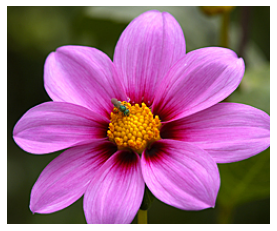

In [91]:
# Reading and displaying the image with matplotlib
image = mpimg.imread(imagepath)
plt.axis("off")
plt.imshow(image)
plt.show()

In [92]:
image.shape

(207, 250, 3)

In [93]:
# Splitting the RED, BLUE and GREEN channels
r,g,b = image[:,:,0],image[:,:,1],image[:,:,2]

In [94]:
r.shape,g.shape,b.shape

((207, 250), (207, 250), (207, 250))

In [95]:
# Plotting all the channels image

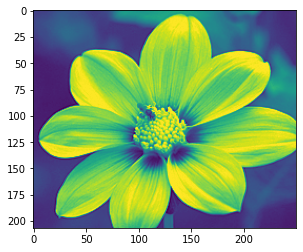

In [96]:
plt.imshow(r)

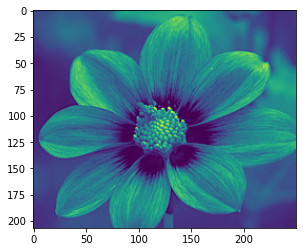

In [97]:
plt.imshow(g)

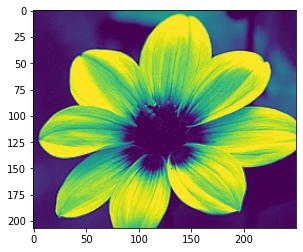

In [98]:
plt.imshow(b)

In [99]:
# Image Compression with PCA

In [100]:
n_components = 50

In [101]:
# Define a pca object for a particular channel
# Use .fit to fit the channel data.
# Transform the data and store it in a new variable.
# Do the above steps for all the channels.

In [102]:
pca_r = PCA(n_components=n_components)
pca_r.fit(r)
tpca_r = pca_r.transform(r)

In [103]:
pca_g = PCA(n_components=n_components)
pca_g.fit(g)
tpca_g = pca_g.transform(g)

In [104]:
pca_b = PCA(n_components=n_components)
pca_b.fit(b)
tpca_b = pca_b.transform(b)

In [105]:
# Plotting the variance and eigen values graph (i.e, all Principal Components)

<BarContainer object of 50 artists>

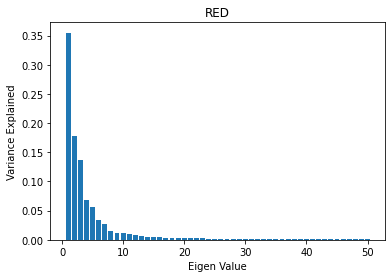

In [106]:
plt.title("RED")
plt.xlabel("Eigen Value")
plt.ylabel("Variance Explained")
plt.bar(list(range(1,n_components+1)),pca_r.explained_variance_ratio_)

<BarContainer object of 50 artists>

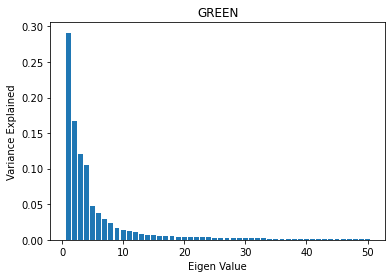

In [107]:
plt.title("GREEN")
plt.xlabel("Eigen Value")
plt.ylabel("Variance Explained")
plt.bar(list(range(1,n_components+1)),pca_g.explained_variance_ratio_)

<BarContainer object of 50 artists>

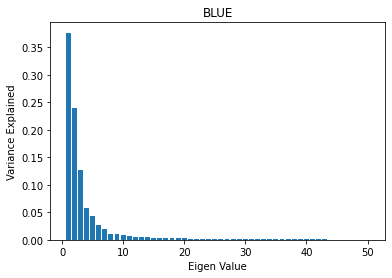

In [108]:
plt.title("BLUE")
plt.xlabel("Eigen Value")
plt.ylabel("Variance Explained")
plt.bar(list(range(1,n_components+1)),pca_b.explained_variance_ratio_)

In [109]:
# The data of the image is fit and principal components are generated,
# Now inverse_transform the transformed data to generate the compressed image.
r_reduced = pca_r.inverse_transform(tpca_r)
b_reduced = pca_b.inverse_transform(tpca_b)
g_reduced = pca_g.inverse_transform(tpca_g)

In [110]:
# To merge all the 3 channels for getting the compressed image
compressed = np.dstack((r_reduced,g_reduced,b_reduced))

In [111]:
def normalize(x):
    """
    Normalize a list of sample image data in the range of 0 to 1,
    x: List of image data.  The image shape is (width, height, 3),
    return: Numpy array of normalized data
    """
    return np.array((x - np.min(x)) / (np.max(x) - np.min(x)))

In [112]:
# Since the compressed data will be not normalized,
# we need to normailze to get the neat compressed image.

compressed = normalize(compressed)

In [113]:
# The compressed data will be in range(0,1),
# We need to convert the data into range(0,255)

compressedImage = Image.fromarray((compressed * 255).astype(np.uint8))
compressedImage.save("static/ci1.jpeg")

In [114]:
# To print the sizes of the image and compressedImage

imageSize = os.path.getsize(imagepath)
compressedImageSize = os.path.getsize("static/ci1.jpeg")
print("Image size in bytes:",imageSize)
print("Compressed Image size in bytes:",compressedImageSize)
print("Bytes compressed:",imageSize-compressedImageSize)

Image size in bytes: 70262
Compressed Image size in bytes: 9445
Bytes compressed: 60817


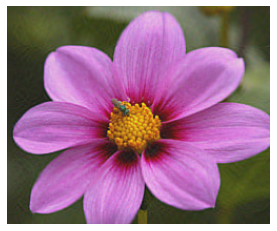

In [115]:
# Plotting the compressed Image

plt.axis("off")
plt.imshow(compressedImage)